In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from nilearn.plotting import plot_design_matrix

%load_ext autoreload
%autoreload 2
from dd_kable_analysis.config_loader import load_config
from dd_kable_analysis.tseries_model.design_matrix import (
    get_confounds,
    get_frametimes,
    make_design_matrix,
)
from dd_kable_analysis.tseries_model.tseries_model_qa import make_design_qa_figure

In [2]:
cfg = load_config()

# What is this?
Here I'm developing some code for generating the design matrices and running the beta series models


Note: What Josh wants for confounds = "I'd typically include xyz, squares and derivatives"


Below I illustrate different functions that were creates for the purposes of modeling and running QA on the design matrix.

### filename structure for later

sub-SUBNUM_ses-scan1_task-itc_run-RUNNUM_contrast-trial0_output-effectsize.nii.gz

In [3]:
good_subs_csv = cfg.subject_lists / 'initial_qa_pass_subjects_runs.csv'
good_subs = pd.read_csv(good_subs_csv)

In [4]:
good_subs.shape

(454, 3)

In [5]:
entry_num = 12
sub_id = good_subs['sub_id'][entry_num]
run = good_subs['run'][entry_num]
print(f'Subject: {sub_id}')
print(f'Run: {run}')

# 0063, run 2

Subject: dmp0060
Run: 2


### Main functions for pulling out confounds, creating frame_times, making the design matrix, making the contrasts and generating the design matrix QA figure

Note the regex for the confound we use are set in the `config.yaml`.

In [6]:
selected_confounds = get_confounds(cfg, sub_id, run)
print(selected_confounds.head())

   cosine00  cosine01  cosine02     rot_x  rot_x_derivative1     rot_y  \
0  0.138659  0.138612  0.138533  0.003420           0.000000 -0.000002   
1  0.138533  0.138106  0.137396  0.004649           0.001229 -0.000179   
2  0.138280  0.137096  0.135131  0.005845           0.001196  0.000933   
3  0.137901  0.135586  0.131758  0.001136          -0.004709  0.000925   
4  0.137396  0.133582  0.127303  0.000294          -0.000842  0.000024   

   rot_y_derivative1     rot_z  rot_z_derivative1  
0           0.000000 -0.000606           0.000000  
1          -0.000177  0.000475           0.001081  
2           0.001112  0.001415           0.000940  
3          -0.000008  0.000428          -0.000987  
4          -0.000901  0.000119          -0.000309  


In [7]:
frame_times = get_frametimes(cfg, sub_id, run)
print(frame_times)

[  0.   3.   6.   9.  12.  15.  18.  21.  24.  27.  30.  33.  36.  39.
  42.  45.  48.  51.  54.  57.  60.  63.  66.  69.  72.  75.  78.  81.
  84.  87.  90.  93.  96.  99. 102. 105. 108. 111. 114. 117. 120. 123.
 126. 129. 132. 135. 138. 141. 144. 147. 150. 153. 156. 159. 162. 165.
 168. 171. 174. 177. 180. 183. 186. 189. 192. 195. 198. 201. 204. 207.
 210. 213. 216. 219. 222. 225. 228. 231. 234. 237. 240. 243. 246. 249.
 252. 255. 258. 261. 264. 267. 270. 273. 276. 279. 282. 285. 288. 291.
 294. 297. 300. 303. 306. 309.]


### The singular error occurs even if I only model the beta series
I'm not too worried about this since I'll be inspecting the cVIFs for our contrasts and further checking for outliers

(104, 40)


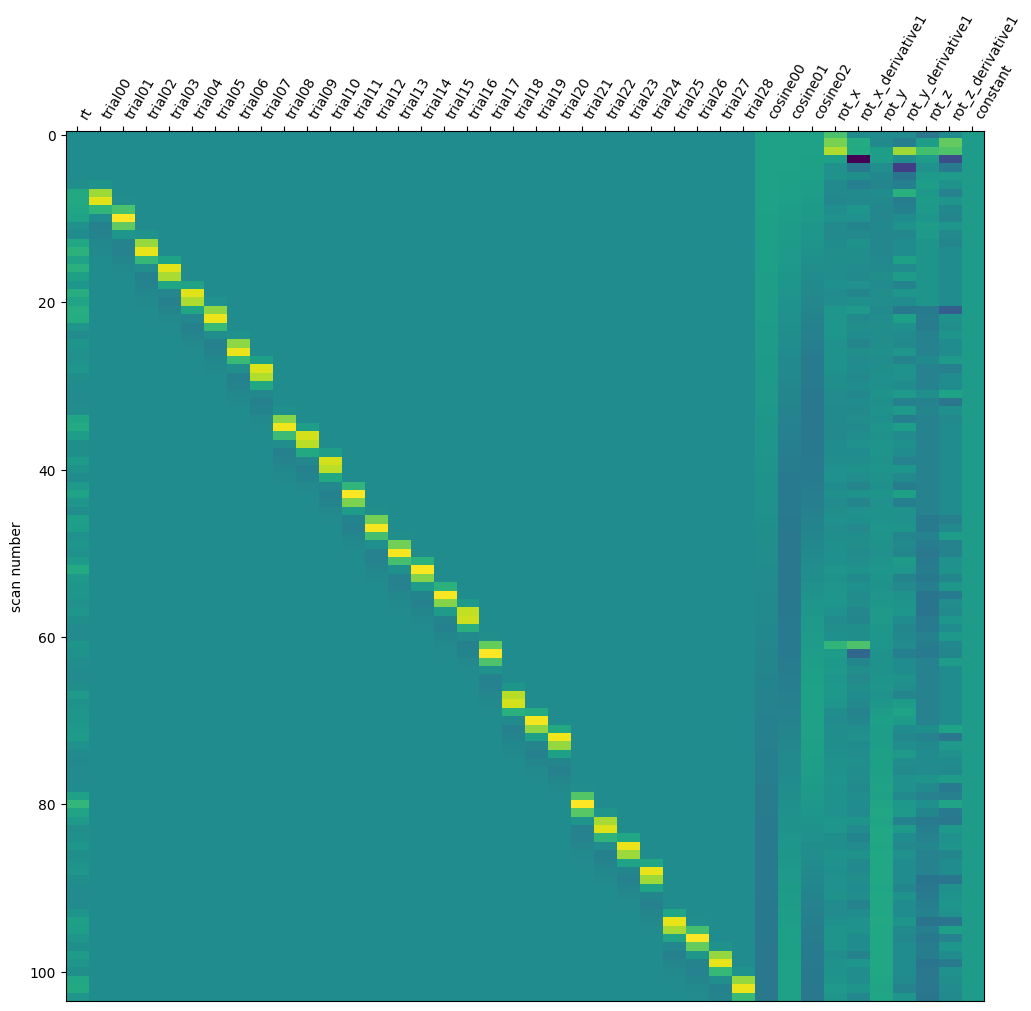

In [8]:
behav_data, events_data, desmat = make_design_matrix(cfg, sub_id, run)
print(desmat.shape)

plot_design_matrix(desmat)
plt.show()

In [9]:
behav_data

,onset,duration,amount,Delay,choseAccept,RT,choseRight,trial_num,trial_type
0,15.564,4,75,60,1,3.003,0,0,trial00
1,22.614,4,81,58,1,2.137,0,1,trial01
2,33.663,4,43,19,1,3.912,0,2,trial02
3,41.696,4,73,44,1,3.198,0,3,trial03
4,50.729,4,58,53,1,3.381,0,4,trial04
5,57.762,4,41,27,0,3.540,1,5,trial05
6,69.795,4,45,107,0,1.043,1,6,trial06
7,77.828,4,45,157,0,0.866,1,7,trial07
8,96.877,4,54,23,1,2.704,0,8,trial08
9,101.928,4,78,129,0,0.757,1,9,trial09


### Huh, the task doesn't start for while (for this subject)
I sort of wondered if there were possibly warmup scans that we had to remove (and then adjust the onset files).  I looked at one subject's run and the early scans are not noisy, so I think the data are fine...they just took a moment to actually start doing the task, I guess.  I'll visually inspect all design matrices later and I also need to go through the fmriprep html files to better undrestand the data and for the purposes of QA.  I'll do that on globus later.

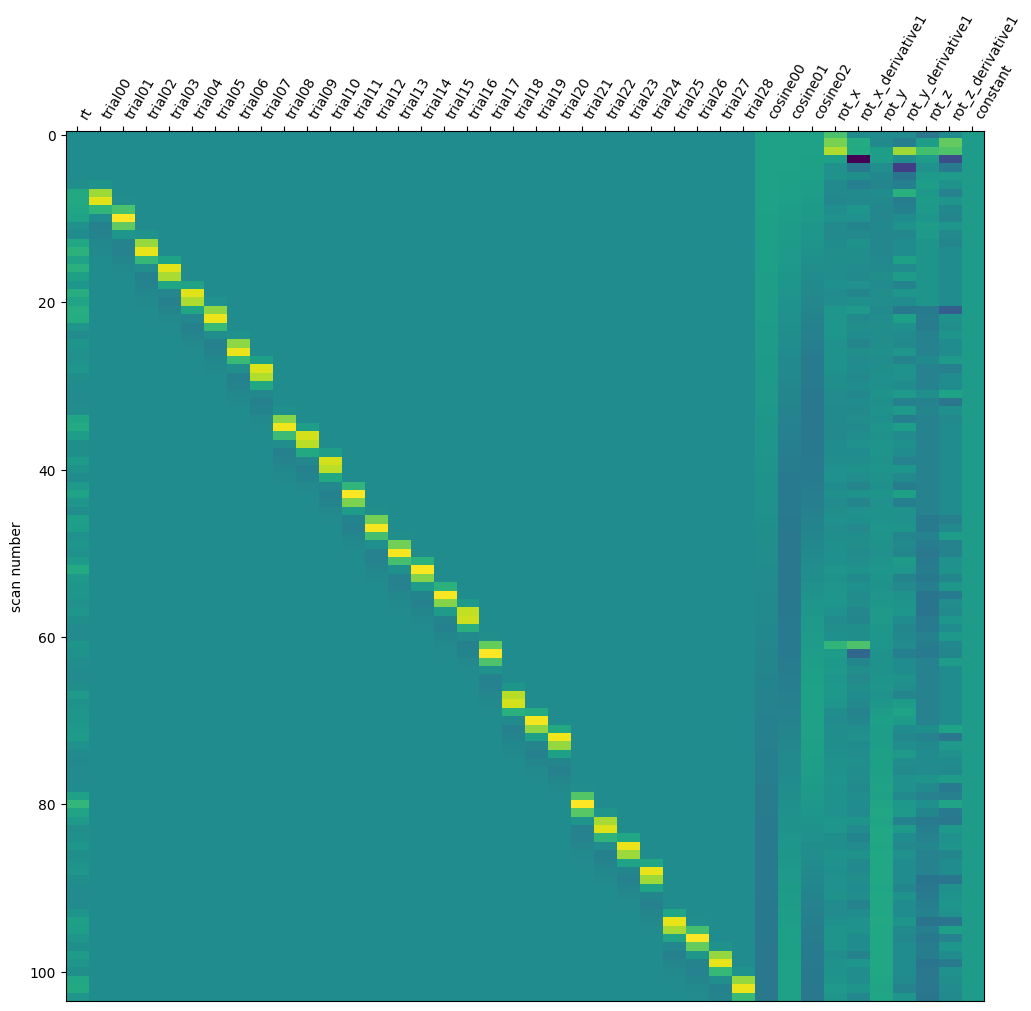

In [10]:
plot_design_matrix(desmat)
plt.show()

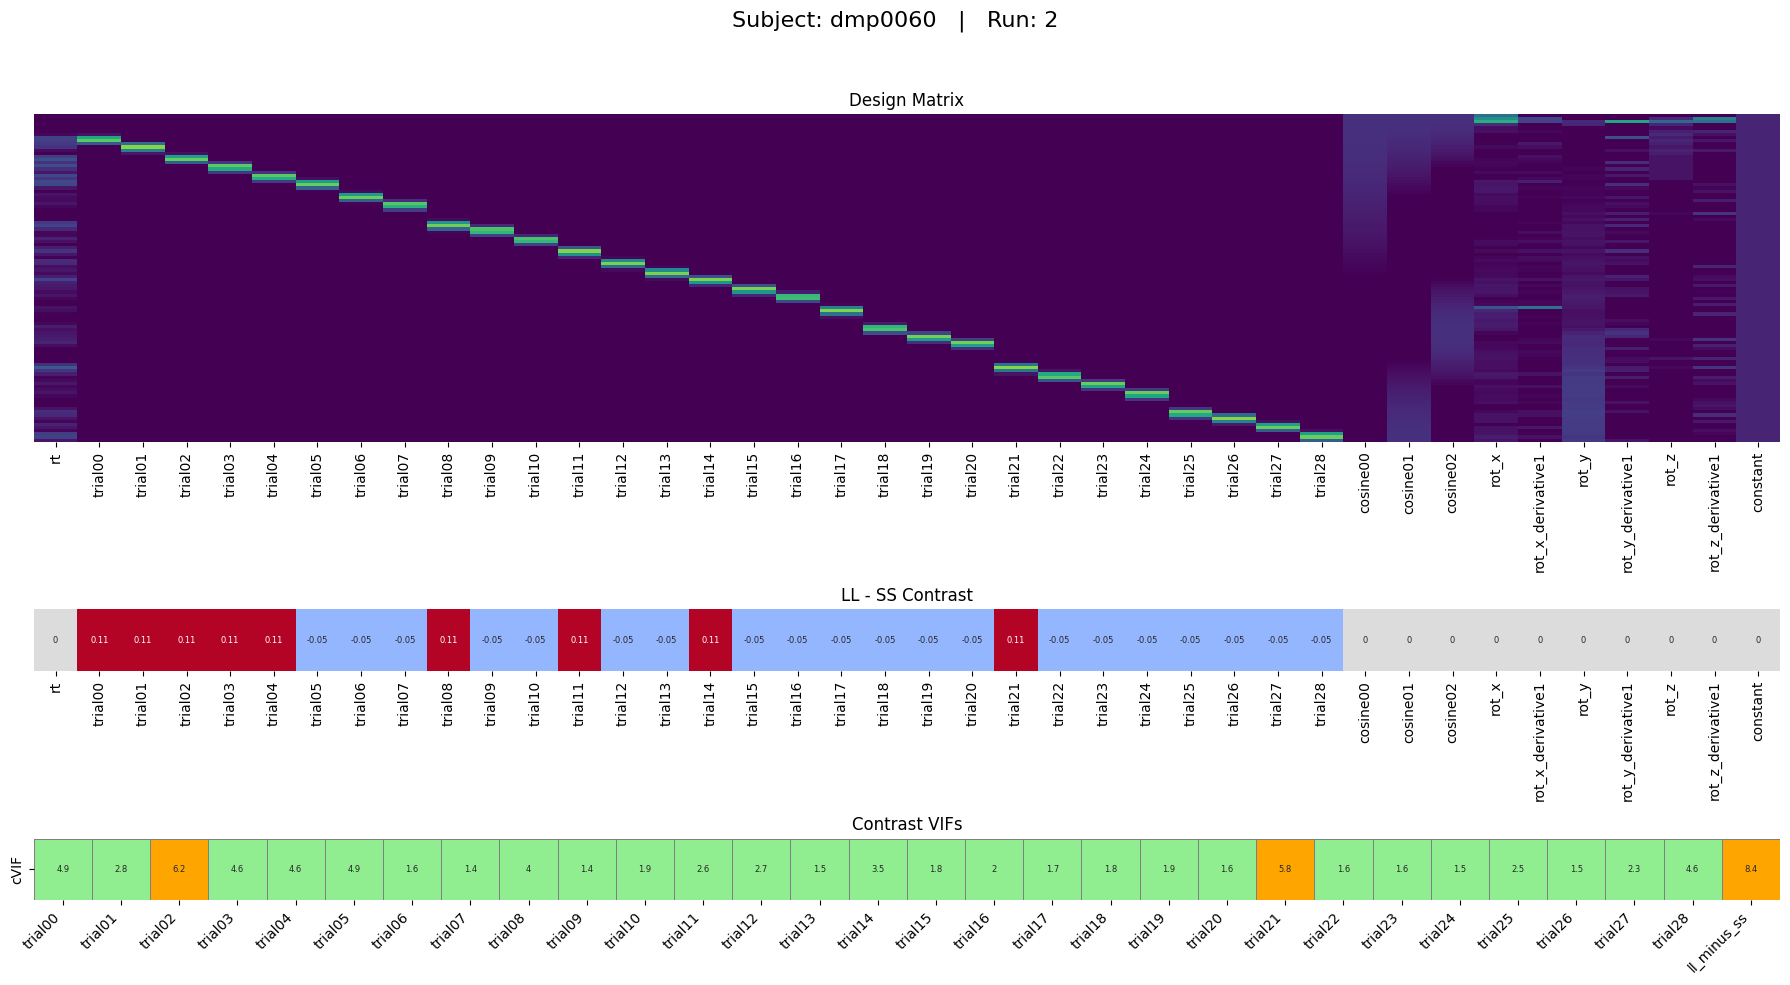

In [11]:
fig_out = make_design_qa_figure(cfg, sub_id, run, show=True)

In [12]:
# Set up FirstLevelModel with SPM HRF and highpass filter
from nilearn.glm.first_level import FirstLevelModel

from dd_kable_analysis.data_io import resolve_file
from dd_kable_analysis.tseries_model.contrast_model import (
    make_beta_series_constrast_set,
)

# Model inputs
behav_data, events_data, desmat = make_design_matrix(cfg, sub_id, run)
contrasts = make_beta_series_constrast_set(desmat, behav_data)
bold_file = resolve_file(cfg, sub_id, 'scan1', run, 'bold')


tr = cfg.tr
smoothing_fwhm = cfg.smoothing_fwhm

# Set up FirstLevelModel
fmri_glm = FirstLevelModel(
    t_r=tr, hrf_model='spm', smoothing_fwhm=smoothing_fwhm, verbose=1
)


In [13]:
# Fit the model
print('Fitting FirstLevelModel...')
fmri_glm = fmri_glm.fit(bold_file, design_matrices=desmat)
print('Model fitting complete!')

# Compute contrasts
contrast_results = {}
print(f'\nEstimating {len(contrasts)} contrasts...')

for contrast_name, contrast_def in contrasts.items():
    contrast_map = fmri_glm.compute_contrast(contrast_def, output_type='effect_size')
    contrast_results[contrast_name] = contrast_map

print(f'✓ Computed {len(contrast_results)} contrast maps')
print('\nExample contrasts stored:')
for i, name in enumerate(list(contrast_results.keys())[:5]):
    print(f'  - {name}')
if len(contrast_results) > 5:
    print(f'  ... and {len(contrast_results) - 5} more')

Fitting FirstLevelModel...


/tmp/ipykernel_12858/4026073247.py:3: UserWarning: If design matrices are supplied, [hrf_model, t_r] will be ignored.
  fmri_glm = fmri_glm.fit(bold_file, design_matrices=desmat)


[FirstLevelModel.fit] Loading data from PosixPath('/oak/stanford/groups/russpold/users/buckholtz/DD_Kable/derivatives/fmriprep/sub-dmp0060/ses-scan1/func/sub-dmp0060_ses-scan1_task-itc_run-2_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz')
[FirstLevelModel.fit] Computing mask
[FirstLevelModel.fit] Resamping mask
[FirstLevelModel.fit] Finished fit
[FirstLevelModel.fit] Computing run 1 out of 1 runs (go take a coffee, a big one).
[FirstLevelModel.fit] Performing mask computation.
[FirstLevelModel.fit] Loading data from <nibabel.nifti1.Nifti1Image object at 0x7f355a9effe0>
[FirstLevelModel.fit] Smoothing images
[FirstLevelModel.fit] Extracting region signals
[FirstLevelModel.fit] Cleaning extracted signals
[FirstLevelModel.fit] Masking took 9 seconds.
[FirstLevelModel.fit] Performing GLM computation.
[FirstLevelModel.fit] GLM took 9 seconds.
[FirstLevelModel.fit] Computation of 1 runs done in 19 seconds.
Model fitting complete!

Estimating 30 contrasts...
[FirstLevelModel.comput

In [14]:
contrasts

{'trial00': 'trial00',
 'trial01': 'trial01',
 'trial02': 'trial02',
 'trial03': 'trial03',
 'trial04': 'trial04',
 'trial05': 'trial05',
 'trial06': 'trial06',
 'trial07': 'trial07',
 'trial08': 'trial08',
 'trial09': 'trial09',
 'trial10': 'trial10',
 'trial11': 'trial11',
 'trial12': 'trial12',
 'trial13': 'trial13',
 'trial14': 'trial14',
 'trial15': 'trial15',
 'trial16': 'trial16',
 'trial17': 'trial17',
 'trial18': 'trial18',
 'trial19': 'trial19',
 'trial20': 'trial20',
 'trial21': 'trial21',
 'trial22': 'trial22',
 'trial23': 'trial23',
 'trial24': 'trial24',
 'trial25': 'trial25',
 'trial26': 'trial26',
 'trial27': 'trial27',
 'trial28': 'trial28',
 'll_minus_ss': '1/9*trial00 + 1/9*trial01 + 1/9*trial02 + 1/9*trial03 + 1/9*trial04 + 1/9*trial08 + 1/9*trial11 + 1/9*trial14 + 1/9*trial21 + -1/20*trial05 + -1/20*trial06 + -1/20*trial07 + -1/20*trial09 + -1/20*trial10 + -1/20*trial12 + -1/20*trial13 + -1/20*trial15 + -1/20*trial16 + -1/20*trial17 + -1/20*trial18 + -1/20*trial19 